Importing the Dependencies

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

In [ ]:
#Loading Datasets
car_dataset = pd.read_csv("/car data.csv")
car_dataset

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [ ]:
#Ispecting 1st 5 rows
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [ ]:
#Checking total no. of rows & Columns
car_dataset.shape

(301, 9)

In [ ]:
#Some Information about Datasets
car_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [ ]:
#Checking the missing values
car_dataset.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [ ]:
#Checking the Distribution of Categorical data
print(car_dataset.Fuel_Type.value_counts())
print(car_dataset.Seller_Type.value_counts())
print(car_dataset.Transmission.value_counts())

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64
Dealer        195
Individual    106
Name: Seller_Type, dtype: int64
Manual       261
Automatic     40
Name: Transmission, dtype: int64


Encoding the Categorical Data

In [ ]:
#Encoding the 'Fuel_Type' Column
car_dataset.replace({'Fuel_Type':{'Petrol':0, 'Diesel':1, 'CNG':2}},inplace=True)

#Encoding the 'Seller_Type' Column
car_dataset.replace({'Seller_Type':{'Dealer':0, 'Individual':1}},inplace=True)

#Encoding the 'Transmission' Column
car_dataset.replace({'Transmission':{'Manual':0, 'Automatic':1}},inplace=True)

# New Section

In [ ]:
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


Splitting the Data & Target

In [ ]:
x = car_dataset.drop(['Car_Name','Selling_Price',],axis=1)
y= car_dataset['Selling_Price']

In [ ]:
x

,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,5.59,27000,0,0,0,0
1,2013,9.54,43000,1,0,0,0
2,2017,9.85,6900,0,0,0,0
3,2011,4.15,5200,0,0,0,0
4,2014,6.87,42450,1,0,0,0
...,...,...,...,...,...,...,...
296,2016,11.60,33988,1,0,0,0
297,2015,5.90,60000,0,0,0,0
298,2009,11.00,87934,0,0,0,0
299,2017,12.50,9000,1,0,0,0


In [ ]:
y

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64

Splitting the Data into Training & Test Data

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.1, random_state = 2)

Model Training

1 Linear Regression

In [ ]:
lin_reg_model = LinearRegression()

In [ ]:
lin_reg_model.fit(x_train,y_train)

LinearRegression()

Evaluate Model

In [ ]:
#Prediction on Training Data
training_data_prediction = lin_reg_model.predict(x_train)

In [ ]:
#R Squared error
error_square = metrics.r2_score(y_train, training_data_prediction)
print("error_square is :", error_square)

error_square is : 0.8799451660493711


Visualize the Actual & Predicted Prices

Text(0.5, 1.0, 'Actual vs Predicted Prices')

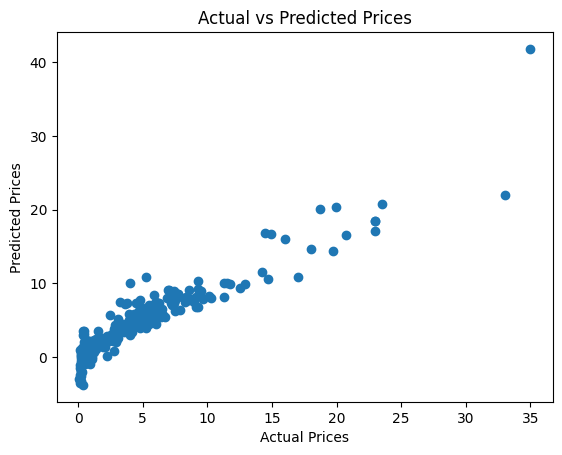

In [ ]:
plt.scatter(y_train, training_data_prediction)  #Training data
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Prices")

In [ ]:
#Prediction on Test Data
Test_data_prediction = lin_reg_model.predict(x_test)

In [ ]:
#R Squared error --test data
error_square = metrics.r2_score(y_test, Test_data_prediction)
print("error_square is :", error_square)

error_square is : 0.8365766715027051


Text(0.5, 1.0, 'Actual vs Predicted Prices')

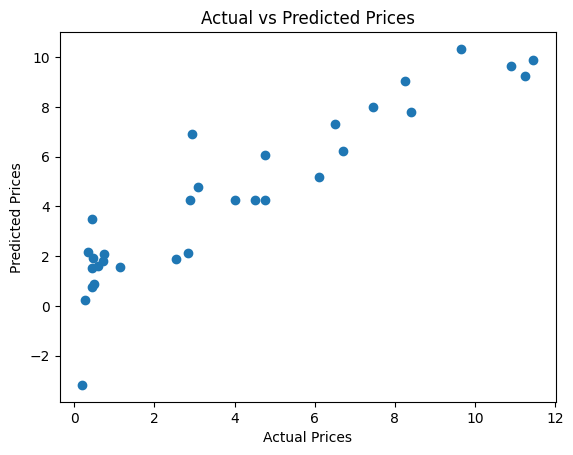

In [ ]:
plt.scatter(y_test, Test_data_prediction)  #Test data
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Prices")

2. Lasso Regression

In [ ]:
lass_reg_model = Lasso()

In [ ]:
lass_reg_model.fit(x_train,y_train)

Lasso()

Evaluate Model

In [ ]:
#Prediction on Training Data
training_data_prediction = lass_reg_model.predict(x_train)

In [ ]:
#R Squared error
error_square = metrics.r2_score(y_train, training_data_prediction)
print("error_square is :", error_square)

error_square is : 0.8427856123435794


Visualize the Actual & Predicted Prices

Text(0.5, 1.0, 'Actual vs Predicted Prices')

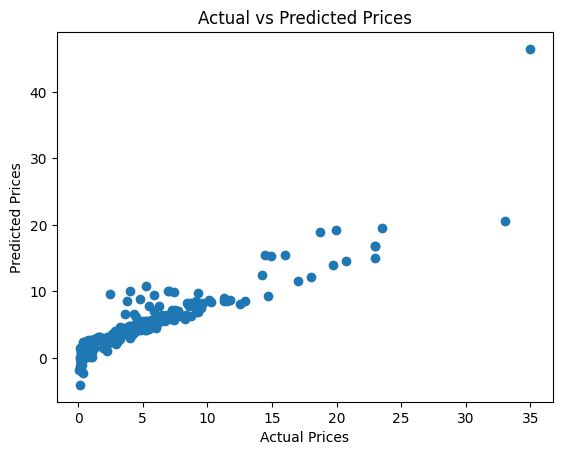

In [ ]:
plt.scatter(y_train, training_data_prediction)  #Training data
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Prices")

In [ ]:
#Prediction on Test Data
Test_data_prediction = lass_reg_model.predict(x_test)

In [ ]:
#R Squared error --test data
error_square = metrics.r2_score(y_test, Test_data_prediction)
print("error_square is :", error_square)

error_square is : 0.8709167941173195


Text(0.5, 1.0, 'Actual vs Predicted Prices')

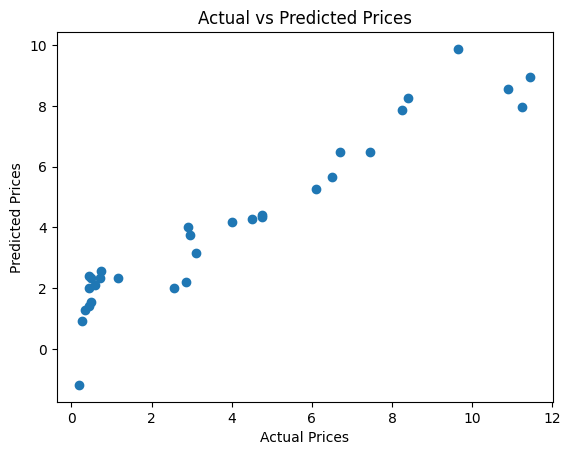

In [ ]:
plt.scatter(y_test, Test_data_prediction)  #Test data
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Prices")